In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Load the data
df = pd.read_excel('../data/raw_data/Online Retail.xlsx')

In [52]:
# Basic data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000   

In [53]:
# Check for missing values and remove rows with missing values
print(df.isnull().sum())
df = df.dropna()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [54]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [55]:
# Calculate total purchase amount for each transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [56]:
# Group by customer and calculate features
customer_features = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'TotalAmount': 'sum',
    'InvoiceDate': lambda x: (x.max() - x.min()).days
})

In [57]:
customer_features.columns = ['PurchaseFrequency', 'TotalSpent', 'CustomerLifetime']

In [58]:
# Calculate average order value
customer_features['AverageOrderValue'] = customer_features['TotalSpent'] / customer_features['PurchaseFrequency']

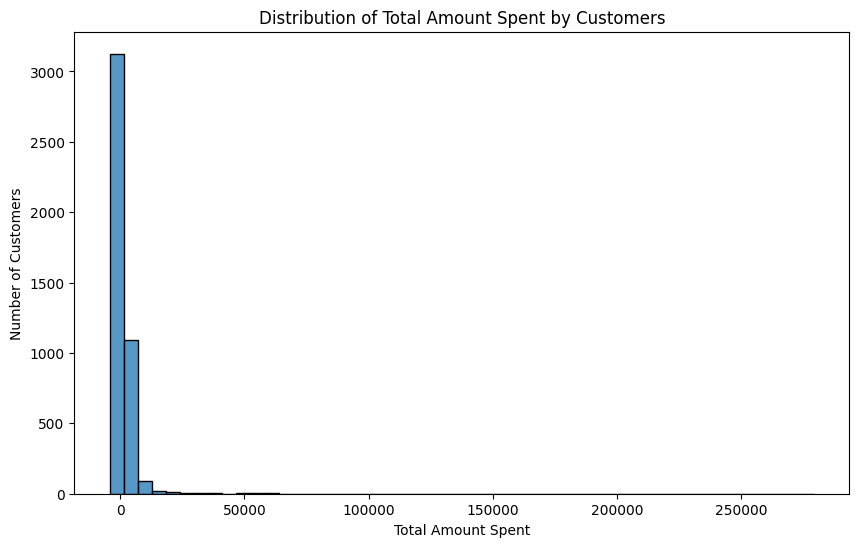

In [59]:
# Visualize the distribution of total spent
plt.figure(figsize=(10, 6))
sns.histplot(customer_features['TotalSpent'], bins=50)
plt.title('Distribution of Total Amount Spent by Customers')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Customers')
plt.show()

In [60]:
# Identify customers who have received discounts
discounted_invoices = df[df['UnitPrice'] < 0]
customers_with_discounts = discounted_invoices['CustomerID'].unique()

In [61]:
print(f"Number of customers who have received discounts: {len(customers_with_discounts)}")

Number of customers who have received discounts: 0


In [62]:
# Save processed data for model training
customer_features.to_csv('../data/processed/customer_features.csv')